In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
datapath = "https://raw.githubusercontent.com/codingalzi/handson-ml3/master/notebooks/data/lifesat/"

In [ ]:
gdp_2015 = pd.read_csv(datapath + 'gdp_per_capita_2015.csv', thousands=',', delimiter='\t',
                       encoding='latin1', na_values='n/a')

In [ ]:
gdp_2015.head()

,Country,Subject Descriptor,Units,Scale,Country/Series-specific Notes,2015,Estimates Start After
0,Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
1,Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.383,2010.0
2,Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4318.135,2014.0
3,Angola,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4100.315,2014.0
4,Antigua and Barbuda,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",14414.302,2011.0


In [ ]:
gdp_2015.set_index('Country', inplace=True)
gdp_2015

,Subject Descriptor,Units,Scale,Country/Series-specific Notes,2015,Estimates Start After
Country,,,,,,
Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.383,2010.0
Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4318.135,2014.0
Angola,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4100.315,2014.0
Antigua and Barbuda,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",14414.302,2011.0
...,...,...,...,...,...,...
Vietnam,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",2088.344,2012.0
Yemen,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",1302.940,2008.0
Zambia,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",1350.151,2010.0


In [ ]:
gdp_2015.rename(columns={"2015" : 'GDP per capita'}, inplace=True)
gdp_2015.head()

,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per capita,Estimates Start After
Country,,,,,,
Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.383,2010.0
Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4318.135,2014.0
Angola,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4100.315,2014.0
Antigua and Barbuda,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",14414.302,2011.0


In [ ]:
gdp_2015.shape

(190, 6)

In [ ]:
# 삶 만족도 데이터 적재, 정제, 전처리
bli = pd.read_csv(datapath + 'oecd_bli_2015.csv', thousands=',')

In [ ]:
bli.shape

(3292, 17)

In [ ]:
bli.head()

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.1,E,Estimated value
1,AUT,Austria,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.0,NaN,NaN
2,BEL,Belgium,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,2.0,NaN,NaN
3,CAN,Canada,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,0.2,NaN,NaN
4,CZE,Czech Republic,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,0.9,NaN,NaN


In [ ]:
bli.Indicator.unique().shape # 측정지표만 24개

(24,)

In [ ]:
bli.Indicator.unique()

array(['Dwellings without basic facilities', 'Housing expenditure',
       'Rooms per person', 'Household net adjusted disposable income',
       'Household net financial wealth', 'Employment rate',
       'Job security', 'Long-term unemployment rate', 'Personal earnings',
       'Quality of support network', 'Educational attainment',
       'Student skills', 'Years in education', 'Air pollution',
       'Water quality', 'Consultation on rule-making', 'Voter turnout',
       'Life expectancy', 'Self-reported health', 'Life satisfaction',
       'Assault rate', 'Homicide rate',
       'Employees working very long hours',
       'Time devoted to leisure and personal care'], dtype=object)

In [ ]:
# oecd 36개국 => 중복된 데이터가 있다
mask = bli.Indicator == 'Life satisfaction'
oecd_life = bli[mask]
oecd_life

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
2669,AUS,Australia,SW_LIFS,Life satisfaction,L,Value,TOT,Total,AVSCORE,Average score,0,units,NaN,NaN,7.3,NaN,NaN
2670,AUT,Austria,SW_LIFS,Life satisfaction,L,Value,TOT,Total,AVSCORE,Average score,0,units,NaN,NaN,6.9,NaN,NaN
2671,BEL,Belgium,SW_LIFS,Life satisfaction,L,Value,TOT,Total,AVSCORE,Average score,0,units,NaN,NaN,6.9,NaN,NaN
2672,CAN,Canada,SW_LIFS,Life satisfaction,L,Value,TOT,Total,AVSCORE,Average score,0,units,NaN,NaN,7.3,NaN,NaN
2673,CZE,Czech Republic,SW_LIFS,Life satisfaction,L,Value,TOT,Total,AVSCORE,Average score,0,units,NaN,NaN,6.5,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2843,CHL,Chile,SW_LIFS,Life satisfaction,L,Value,LW,Low,AVSCORE,Average score,0,units,NaN,NaN,6.0,NaN,NaN
2844,EST,Estonia,SW_LIFS,Life satisfaction,L,Value,LW,Low,AVSCORE,Average score,0,units,NaN,NaN,5.1,NaN,NaN
2845,RUS,Russia,SW_LIFS,Life satisfaction,L,Value,LW,Low,AVSCORE,Average score,0,units,NaN,NaN,5.4,NaN,NaN
2846,SVN,Slovenia,SW_LIFS,Life satisfaction,L,Value,LW,Low,AVSCORE,Average score,0,units,NaN,NaN,5.0,NaN,NaN


In [ ]:
oecd_life.shape # 179 row로 변환됨

(179, 17)

In [ ]:
bli.INEQUALITY.unique()

array(['TOT', 'MN', 'WMN', 'HGH', 'LW'], dtype=object)

In [ ]:
mask = bli.INEQUALITY == 'TOT'
oecd_bli = bli[mask]

In [ ]:
oecd_bli.shape

(888, 17)

In [ ]:
(36+1) * 24 == 888 # 36개국이 24개 지표로 측정했음을 뜻함

True

In [ ]:
(oecd_bli['Country'] == 'Korea').sum()

24

In [ ]:
# pivot 축을 고정시켜놓는다
oecd_bli = oecd_bli.pivot(index='Country', columns='Indicator', values='Value')
oecd_bli

Indicator,Air pollution,Assault rate,Consultation on rule-making,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Homicide rate,Household net adjusted disposable income,Household net financial wealth,...,Long-term unemployment rate,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education
Country,,,,,,,,,,,,,,,,,,,,,
Australia,13.0,2.1,10.5,1.1,76.0,14.02,72.0,0.8,31588.0,47657.0,...,1.08,50449.0,92.0,2.3,85.0,512.0,14.41,93.0,91.0,19.4
Austria,27.0,3.4,7.1,1.0,83.0,7.61,72.0,0.4,31173.0,49887.0,...,1.19,45199.0,89.0,1.6,69.0,500.0,14.46,75.0,94.0,17.0
Belgium,21.0,6.6,4.5,2.0,72.0,4.57,62.0,1.1,28307.0,83876.0,...,3.88,48082.0,94.0,2.2,74.0,509.0,15.71,89.0,87.0,18.9
Brazil,18.0,7.9,4.0,6.7,45.0,10.41,67.0,25.5,11664.0,6844.0,...,1.97,17177.0,90.0,1.6,69.0,402.0,14.97,79.0,72.0,16.3
Canada,15.0,1.3,10.5,0.2,89.0,3.94,72.0,1.5,29365.0,67913.0,...,0.90,46911.0,92.0,2.5,89.0,522.0,14.25,61.0,91.0,17.2
Chile,46.0,6.9,2.0,9.4,57.0,15.42,62.0,4.4,14533.0,17733.0,...,1.59,22101.0,86.0,1.2,59.0,436.0,14.41,49.0,73.0,16.5
Czech Republic,16.0,2.8,6.8,0.9,92.0,6.98,68.0,0.8,18404.0,17299.0,...,3.12,20338.0,85.0,1.4,60.0,500.0,14.98,59.0,85.0,18.1
Denmark,15.0,3.9,7.0,0.9,78.0,2.03,73.0,0.3,26491.0,44488.0,...,1.78,48347.0,95.0,1.9,72.0,498.0,16.06,88.0,94.0,19.4
Estonia,9.0,5.5,3.3,8.1,90.0,3.30,68.0,4.8,15167.0,7680.0,...,3.82,18944.0,89.0,1.5,54.0,526.0,14.90,64.0,79.0,17.5


In [ ]:
oecd_bli.loc['Korea']

Indicator
Air pollution                                   30.00
Assault rate                                     2.10
Consultation on rule-making                     10.40
Dwellings without basic facilities               4.20
Educational attainment                          82.00
Employees working very long hours               18.72
Employment rate                                 64.00
Homicide rate                                    1.10
Household net adjusted disposable income     19510.00
Household net financial wealth               29091.00
Housing expenditure                             16.00
Job security                                     3.20
Life expectancy                                 81.30
Life satisfaction                                5.80
Long-term unemployment rate                      0.01
Personal earnings                            36354.00
Quality of support network                      72.00
Rooms per person                                 1.40
Self-reported heal

In [ ]:
oecd_bli['Life satisfaction'].head()

Country
Australia    7.3
Austria      6.9
Belgium      6.9
Brazil       7.0
Canada       7.3
Name: Life satisfaction, dtype: float64

In [ ]:
oecd_stats = pd.merge(left=gdp_2015['GDP per capita'], right=oecd_bli['Life satisfaction'], left_index=True, right_index=True)

In [ ]:
oecd_stats

,GDP per capita,Life satisfaction
Country,,
Australia,50961.865,7.3
Austria,43724.031,6.9
Belgium,40106.632,6.9
Brazil,8669.998,7.0
Canada,43331.961,7.3
Chile,13340.905,6.7
Czech Republic,17256.918,6.5
Denmark,52114.165,7.5
Estonia,17288.083,5.6


In [ ]:
oecd_stats.shape

(36, 2)

In [ ]:
oecd_stats.rename(columns={'GDP per capita' : '1인당 GDP', 'Life satisfaction':'삶의 만족도'}, inplace=True)
oecd_stats

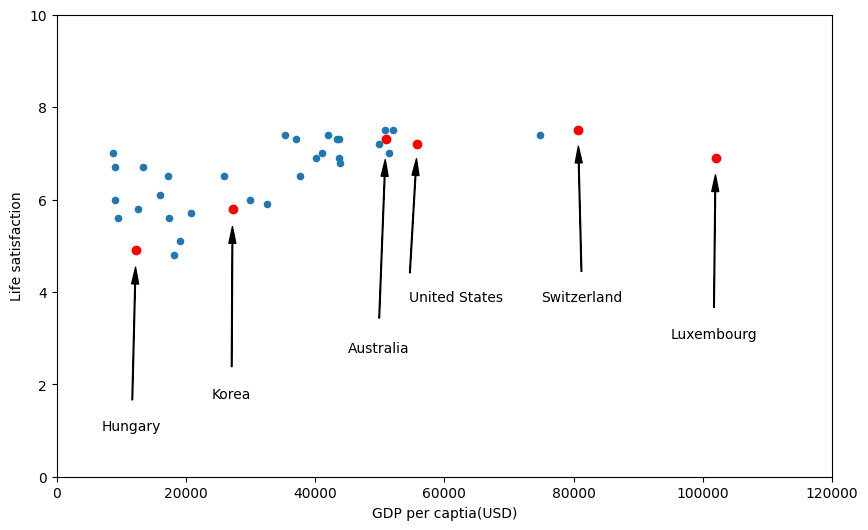

In [ ]:
oecd_stats.plot(kind='scatter', x='1인당 GDP', y='삶의 만족도', figsize=(10,6))
plt.axis([0, 120000, 0, 10])

position_text = {
    "Hungary" : (7000, 1),
    'Korea' : (24000, 1.7),
    'Australia' : (45000, 2.7),
    'United States' : (54500, 3.8),
    'Switzerland' : (75000, 3.8),
    'Luxembourg' : (95000, 3.0)
}
for country, pos_text in position_text.items():
  pos_x, pos_y = oecd_stats.loc[country]
  plt.annotate(country, xy=(pos_x, pos_y), xytext=pos_text,
               arrowprops=dict(facecolor='black', width=0.5, shrink=0.1, headwidth=5))
  plt.plot(pos_x, pos_y, 'ro')
plt.xlabel('GDP per captia(USD)')
plt.ylabel('Life satisfaction')
plt.show()

In [ ]:
oecd_stats.plot(kind='scatter', x='1인당 GDP', y='삶의 만족도', figsize=(10,6))
plt.axis([0, 120000, 0, 10])

position_text = {
    "Hungary" : (7000, 1),
    'Korea' : (24000, 1.7),
    'Australia' : (45000, 2.7),
    'United States' : (54500, 3.8),
    'Switzerland' : (75000, 3.8),
    'Luxembourg' : (95000, 3.0)
}
for country, pos_text in position_text.items():
  pos_x, pos_y = oecd_stats.loc[country]
  plt.annotate(country, xy=(pos_x, pos_y), xytext=pos_text,
               arrowprops=dict(facecolor='black', width=0.5, shrink=0.1, headwidth=5))
  plt.plot(pos_x, pos_y, 'ro')

a = 2.3177337047396075e-05 # 기울기
b = 5.763029861307918 # 절편
X = np.linspace(0, 110000, 1000)
plt.plot(X, b+ a*X, "k:")

plt.xlabel('GDP per captia(USD)')
plt.ylabel('Life satisfaction')
plt.show()